In [1]:
# Daniel Luo 300539272

## Part 1: Reasoning Under Uncertainty Basics

Question 1:

1:   

Using the product rule:
$$P(A,B) = P(A|B) * P(B)$$
$$P(A,B) = P(B|A) * P(A)$$
if P(A,B) = P(B,A) then they are also communicative.
$$P(A,B,C) = P(A,C,B) = P(B,C,A) ...$$

And also the Chain rule: When the values are dependent:

$$P(Z,X,Y) = P(Z|X,Y) * P(X,Y)$$
$$= P(Z|X,Y)*P(Y|X)*P(X)$$

Since Z and X are conditionally independent given Y:
$$P(Z|X,Y) = P(Z|Y)$$
Therefore:
$$P(Z, X, Y) = P(Z|Y) * P(Y|X) * P(X)$$

Therefore the table of P(X,Y,Z) = P(Z,X,Y), as shown below:

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = {"X": [0,0,0,1,1,1,0,1],
       "Y": [0,1,0,0,1,0,1,1],
       "Z": [0,0,1,0,0,1,1,1],
       "P(X, Y, Z)": [0.35*0.7*0.1,0.35*0.9*0.2,0.35*0.1*0.3, 0.65*0.6*0.7, 
                     0.65*0.4*0.2, 0.65*0.6*0.3,0.35*0.9*0.8, 0.65*0.4*0.8],
       "Steps:": ['= 0.35x0.1x0.7','= 0.35x0.9x0.2','= 0.35x0.1x0.3','= 0.65x0.6x0.7',
                 '= 0.65x0.4x0.2','= 0.65x0.6x0.3','= 0.35x0.9x0.8','= 0.65x0.4x0.8']}

In [4]:
df = pd.DataFrame(data)
df

,X,Y,Z,"P(X, Y, Z)",Steps:
0,0,0,0,0.0245,= 0.35x0.1x0.7
1,0,1,0,0.0630,= 0.35x0.9x0.2
2,0,0,1,0.0105,= 0.35x0.1x0.3
3,1,0,0,0.2730,= 0.65x0.6x0.7
4,1,1,0,0.0520,= 0.65x0.4x0.2
5,1,0,1,0.1170,= 0.65x0.6x0.3
6,0,1,1,0.2520,= 0.35x0.9x0.8
7,1,1,1,0.2080,= 0.65x0.4x0.8


2.

Using the product rule when A and B are dependent (which they are):
$$P(A,B) = P(A|B) * P(B)$$
$$P(A,B) = P(B|A) * P(A)$$

X and Y are independent here as well.

In [5]:
data2 = {"X": [0,0,1,1], 
         "Y": [0,1,0,1], 
         "P(X,Y)": [0.1*0.35, 0.9*0.35, 0.6*0.65, 0.4*0.65],
         "Steps": ['= 0.1x0.35', '= 0.9x0.35','= 0.6x0.65', '= 0.4x0.65']}

In [6]:
df2 = pd.DataFrame(data2)
df2

,X,Y,"P(X,Y)",Steps
0,0,0,0.035,= 0.1x0.35
1,0,1,0.315,= 0.9x0.35
2,1,0,0.390,= 0.6x0.65
3,1,1,0.260,= 0.4x0.65


3.

a) P(Z=0) = 0.4125

Using the table above, P(Z=0) = 0.0245 + 0.0630 + 0.2730 + 0.0520

b) P(X=0, Z=0) = 0.0875

Using the table above, P(X=0, Z=0) = 0.0245 + 0.0630

c) P(X=1, Y=0 | Z=1) = 0.36

d) P(X=0 | Y=0, Z=0) =0.0824

This is calculated by P(X, Y, Z) = P(X|Y, Z) x P(Y, Z). P(0,0,0) = 0.0245 = 
0.2975 * P(X|Y, Z)

Therefore: P(X=0|Y=0, Z=0) = 0.0245/0.2975 = 0.0824

Question 2:

1. P(B = t, C = t) = 0.08

We can use the product rule: P(B = t, C = t) = P(B = t | C = t) x P(C = t).
Therefore, P(B = t, C = t) = 0.2 x 0.4 = 0.08.

2. P(A = f|B = t) = 0.7


Via normalisation rule: Keeping B constant, P(A = t|B = t) and P(A = f|B = t) sums up to 1. Therefore P(A = f|B = t) = 1-0.3 = 0.7

3. P(A = t, B = t|C = t) = 0.1

We can use the definition of conditional probability and independence since A and B are conditionally independent given C:
P(A = t, B = t | C = t) = P(A = t | B = t, C = t) x P(B = t | C = t).
Therefore, P(A = t, B = t | C = t) = 0.5 x 0.2 = 0.1.

4. P(A = t|B = t, C = t) = 0.5

Given that A and B are conditionally independent given C, P(A = t|B = t, C = t) = P(A = t|C = t) = 0.5

5. P(A = t, B = t, C = t) = 0.04

P(A = t, B = t, C = t) = P(A = t|B = t, c = t) x P(B = t, C = t) = 0.08 x 0.5 = 0.04

## Part 2: Naive Bayes Method

In [7]:
import pandas as pd
import numpy as np
import io
from collections import defaultdict

In [8]:
testData = pd.read_csv("breast-cancer-test.csv")
trainData = pd.read_csv("breast-cancer-training.csv")

In [9]:
trainData = trainData.drop("Unnamed: 0", axis=1)
testData = testData.drop("Unnamed: 0", axis = 1)
trainData

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
262,recurrence-events,50-59,premeno,35-39,15-17,yes,3,right,right_up,no
263,recurrence-events,50-59,ge40,40-44,6-8,yes,3,left,left_low,yes
264,recurrence-events,50-59,ge40,40-44,6-8,yes,3,left,left_low,yes
265,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no


In [10]:
fnames = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat']
classNames = ['no-recurrence-events', 'recurrence-events']

In [11]:
features = {'age':["10-19", "20-29", "30-39","40-49", "50-59", "60-69", "70-79", "80-89", 
 "90-99"],
'menopause':["lt40", "ge40", "premeno"],
'tumor-size':["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", 
 "40-44", "45-49", "50-54","55-59"],
'inv-nodes':["0-2", "3-5", "6-8", "9-11", "12-14", "15-17", "18-20", "21-23", 
 "24-26", "27-29", "30-32", "33-35","36-39"],
'node-caps':["yes", "no"],
'deg-malig':[1, 2, 3],
'breast':['left', 'right'],
'breast-quad':['left_up', 'left_low', 'right_up', 'right_low', 'central'],
'irradiat':["yes", "no"]}

In [20]:
from collections import defaultdict

class NaiveBayes:
    def __init__(self, features, fnames, classNames):
        self.features = features
        self.fnames = fnames
        self.classNames = classNames
    def train(self, data):
        # Count the numbers of each class and feature value based on the training instances.
        classCounts = {}
        featureCounts = {}
        totalFeatures = set()
        for c in self.classNames:
            label = c
            classCounts[label] = 1
            for i in range(len(self.features)):
                feature = self.features[self.fnames[i]]
                for f in range(len(feature)):
                    featureCounts[str(self.fnames[i]) + " " + str(feature[f]) + " " + str(label)] = 1
                    totalFeatures.add(self.fnames[i])
        for i in range(len(data)):
            features = data.loc[i, data.columns !='class']
            label = data.loc[i, data.columns == 'class']
            classCounts[label[0]] += 1
            for f in range(len(features)):
                featureCounts[str(data.columns[f+1]) + " " + str(features[f]) + " " + str(label[0])] += 1
        # Calculate the probabilities from the counting numbers.
        total_instances = len(data)
        class_probabilities = {}
        feature_probabilities = {}
        for label, count in classCounts.items():
            class_probabilities[label] = count/ total_instances
        for feature, value in featureCounts.items():
            f, v, l = feature.split()
            feature_probabilities[str(f) + " " + str(v) + " " + str(l)] = value / classCounts[l]
        return class_probabilities, feature_probabilities
    
    def calculateScore(testData, instance, label, class_probabilities, feature_probabilities):
        score = class_probabilities[label]
        for f in range(len(instance)):
            featureSet = str(testData.columns[f+1]) +" " + str(instance[f]) +" "+str(label)
            score *= feature_probabilities[str(featureSet)]
        return score
    
    def predict(testData, class_probs, feature_probs):
        predictions = []

        for i in range(len(testData)):
            scores = {}
            print("Input Vector: " + str(list(testData.loc[i, testData.columns != 'class'])))
            for label in class_probs:
                score = NaiveBayes.calculateScore(testData, testData.loc[i, testData.columns != 'class'], label, class_probs, feature_probs)
                scores[label] = score
                print("Y= " + str(label) + " " + "score is: ", score)
             
            predicted_label = max(scores, key=scores.get)
            print("Predicted Class of input vector: ", predicted_label)
            predictions.append(predicted_label)

        return predictions

    def accuracyScore(true, preds):
        correct = 0
        total = len(true)
        for trueY, predY in zip(true, preds):
            if trueY == predY:
                correct += 1
        acc = correct/total
        return acc

In [21]:
nb = NaiveBayes(features, fnames, classNames)
class_probs, feature_probs = nb.train(trainData)

In [44]:
classDf = pd.DataFrame({"Class": ['no-recurrence-events', 'recurrence-events'], "Probability:": [class_probs.get("no-recurrence-events"), class_probs.get("recurrence-events")]})
print(classDf)

                  Class  Probability:
0  no-recurrence-events       0.71161
1     recurrence-events       0.29588


In [45]:
print("Complete Probability table:")
print("")

Complete Probability table:



In [37]:
age = []
meno = []
tumorS = []
invNodes = []
nodeCaps = []
degMalig = []
breast = []
breastQuad = []
irrad = []
age1 = []
meno1 = []
tumorS1 = []
invNodes1 = []
nodeCaps1 = []
degMalig1 = []
breast1 = []
breastQuad1 = []
irrad1 = []
for feats, i in feature_probs.items():
    if feats.split()[0] == "age" and feats.split()[2] == "no-recurrence-events":
        age.append(i)
    if feats.split()[0] == "menopause" and feats.split()[2] == "no-recurrence-events":
        meno.append(i)
    if feats.split()[0] == "tumor-size" and feats.split()[2] == "no-recurrence-events":
        tumorS.append(i)
    if feats.split()[0] == "inv-nodes" and feats.split()[2] == "no-recurrence-events":
        invNodes.append(i)
    if feats.split()[0] == "node-caps" and feats.split()[2] == "no-recurrence-events":
        nodeCaps.append(i)
    if feats.split()[0] == "deg-malig" and feats.split()[2] == "no-recurrence-events":
        degMalig.append(i)
    if feats.split()[0] == "breast" and feats.split()[2] == "no-recurrence-events":
        breast.append(i)
    if feats.split()[0] == "breast-quad" and feats.split()[2] == "no-recurrence-events":
        breastQuad.append(i)
    if feats.split()[0] == "irradiat" and feats.split()[2] == "no-recurrence-events":
        irrad.append(i)
    if feats.split()[0] == "age" and feats.split()[2] == "recurrence-events":
        age1.append(i)
    if feats.split()[0] == "menopause" and feats.split()[2] == "recurrence-events":
        meno1.append(i)
    if feats.split()[0] == "tumor-size" and feats.split()[2] == "recurrence-events":
        tumorS1.append(i)
    if feats.split()[0] == "inv-nodes" and feats.split()[2] == "recurrence-events":
        invNodes1.append(i)
    if feats.split()[0] == "node-caps" and feats.split()[2] == "recurrence-events":
        nodeCaps1.append(i)
    if feats.split()[0] == "deg-malig" and feats.split()[2] == "recurrence-events":
        degMalig1.append(i)
    if feats.split()[0] == "breast" and feats.split()[2] == "recurrence-events":
        breast1.append(i)
    if feats.split()[0] == "breast-quad" and feats.split()[2] == "recurrence-events":
        breastQuad1.append(i)
    if feats.split()[0] == "irradiat" and feats.split()[2] == "recurrence-events":
        irrad1.append(i)

In [40]:
ageDf = pd.DataFrame({"age": features["age"], "No-Recurrence:": age, "Recurrence": age1})
menoDf = pd.DataFrame({"menopause": features["menopause"], "No-Recurrence:": meno, "Recurrence": meno1})
tumorSDf = pd.DataFrame({"tumor-size": features["tumor-size"], "No-Recurrence:": tumorS, "Recurrence": tumorS1})
invNodesDf = pd.DataFrame({"inv-nodes": features["inv-nodes"], "No-Recurrence:": invNodes, "Recurrence": invNodes1})
nodeCapsDf = pd.DataFrame({"node-caps": features["node-caps"], "No-Recurrence:": nodeCaps, "Recurrence": nodeCaps1})
degMaligDf = pd.DataFrame({"deg-malig": features["deg-malig"], "No-Recurrence:": degMalig, "Recurrence": degMalig1})
breastDf= pd.DataFrame({"breast": features["breast"], "No-Recurrence:": breast, "Recurrence": breast1})
breastQuadDf = pd.DataFrame({"breast-quad": features["breast-quad"], "No-Recurrence:": breastQuad, "Recurrence": breastQuad1})
irradDf= pd.DataFrame({"irradiat": features["irradiat"], "No-Recurrence:": irrad, "Recurrence": irrad1})

In [46]:
print(ageDf)
print(menoDf)
print(tumorSDf)
print(invNodesDf )
print(nodeCapsDf )
print(degMaligDf )
print(breastDf)
print(breastQuadDf)
print(irradDf)

     age  No-Recurrence:  Recurrence
0  10-19        0.005263    0.012658
1  20-29        0.010526    0.012658
2  30-39        0.115789    0.202532
3  40-49        0.326316    0.341772
4  50-59        0.342105    0.278481
5  60-69        0.200000    0.215190
6  70-79        0.031579    0.012658
7  80-89        0.005263    0.012658
8  90-99        0.005263    0.012658
  menopause  No-Recurrence:  Recurrence
0      lt40        0.031579    0.012658
1      ge40        0.463158    0.392405
2   premeno        0.515789    0.620253
   tumor-size  No-Recurrence:  Recurrence
0         0-4        0.042105    0.025316
1         5-9        0.026316    0.012658
2       10-14        0.136842    0.025316
3       15-19        0.121053    0.088608
4       20-24        0.184211    0.177215
5       25-29        0.168421    0.240506
6       30-34        0.178947    0.291139
7       35-39        0.063158    0.101266
8       40-44        0.089474    0.088608
9       45-49        0.015789    0.025316
10      

In [26]:
print("Printing the calculate scores and predicted class for each input vector:")
print(" ")
predictions = NaiveBayes.predict(testData, class_probs, feature_probs)

Printing the calculate scores and predicted class for each input vector:
 
Input Vector: ['50-59', 'premeno', '50-54', '0-2', 'yes', 2, 'right', 'left_up', 'yes']
Y= no-recurrence-events score is:  5.0252361135206404e-06
Y= recurrence-events score is:  1.185144746072391e-05
Predicted Class of input vector:  recurrence-events
Input Vector: ['50-59', 'ge40', '35-39', '0-2', 'no', 2, 'left', 'left_up', 'no']
Y= no-recurrence-events score is:  0.00041732849746988816
Y= recurrence-events score is:  4.345530735598768e-05
Predicted Class of input vector:  no-recurrence-events
Input Vector: ['50-59', 'premeno', '10-14', '3-5', 'no', 1, 'right', 'left_up', 'no']
Y= no-recurrence-events score is:  5.8878218806890874e-05
Y= recurrence-events score is:  1.622419224516929e-06
Predicted Class of input vector:  no-recurrence-events
Input Vector: ['40-49', 'premeno', '10-14', '0-2', 'no', 2, 'left', 'left_low', 'yes']
Y= no-recurrence-events score is:  0.00018965784203051642
Y= recurrence-events score

In [15]:
NaiveBayes.accuracyScore(testData['class'], predictions)

0.8

## Part 3: Building Bayesian Network

1.

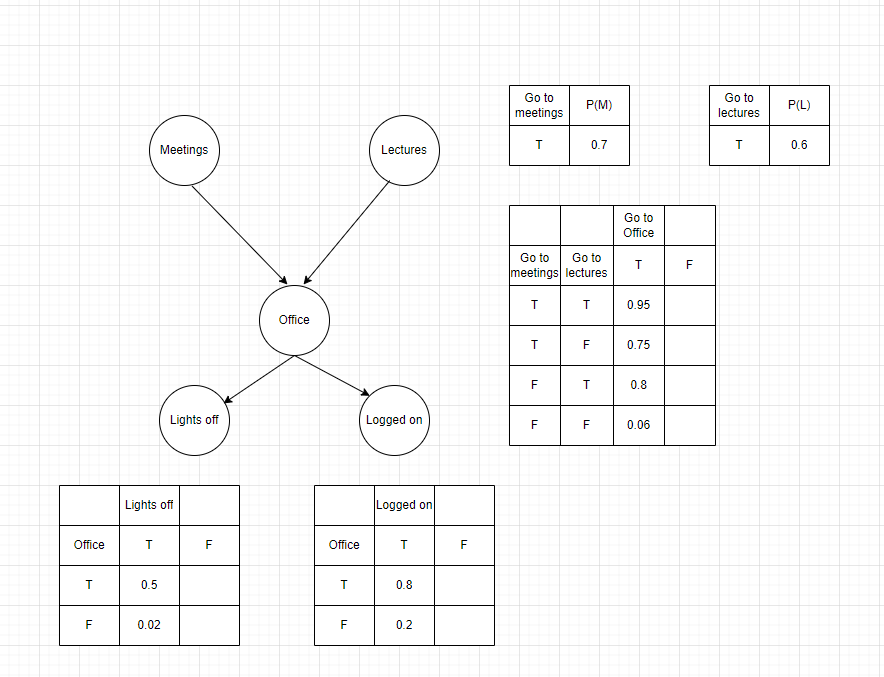

In [16]:
from PIL import Image
img = Image.open("bay.png")
img

2.

The number of free parameters in a model is the number of variables/probabilities that can't be derived but have to be estimated to the best of our ability.

In the case of common effect (the relationship between Meetings & Lectures with office:), using the CPT size calculation formula the number of free parameters here is:

#### |Meetings| − 1 + |Lectures| − 1 + |Meetings||Lectures|(|Office| − 1) = 2 − 1 + 2 − 1 + 2×2×1 = 6 

In the case of common cause (the relationship between Office with Lights off & logged on), using the CPT size calculation formula the number of free parameters here is:

#### |Office| − 1 + |Office|(|Lights off| − 1)+ |Office|(|Logged on|-1) = 2 − 1 + 2x1 + 2×1 = 5 

However because both formulas don't account for shared nodes, the total of free parameters should actually be 6 + 5 - 1, to account for Office being the intersecting node. Due to Office being a binary variable, we deduct 1 from the total. Therefore, the total number of free variables is 10.

3.

The joint probability would be written as such:

P(Lectures, $\neg$Meetings, Office, Logged on, Lights off) 

As per the chain rule:
P(Lectures, $\neg$Meetings, Office, Logged on, Lights off) =
P(Lectures) x P($\neg$Meetings) x P(Office|Lectures, $\neg$Meetings) x P(Logged on|Office) x P(Lights|Office)


= 0.6 x P($\neg$Meetings) x 0.8 x 0.8 x 0.5

Since the probability of Rachael going to meetings is entirely independent from the probability of Rachael going to lectures, due to both being binary variables we can make the assumption that the probablity of Rachael not going to her meetings would be 1-P(Meetings)

Therefore a reasonable estimate of P($\neg$Meetings) could be 1-0.7 = 0.3

Therefore P(Lectures, $\neg$Meetings, Office, Logged on, Lights off) = 0.0576

4.

In order to calculate the value of P(Office), we have to consider all the scenarios for this to happen and use the existing conditional probabilities for Rachel being in the office.

**P(Office) = P(Meetings) x P(Lectures) x P(Office|Meetings, Lectures) + P(Meetings) x P($\neg$Lectures) x P(Office|Meetings, $\neg$Lectures) + P($\neg$Meetings) x P(Lectures) x P(Office|$\neg$Meetings, Lectures) + 
P($\neg$Meetings) x P($\neg$Lectures) x P(Office|$\neg$Meetings, $\neg$Lectures)**

**P(Office) = 0.7 x 0.6 x 0.95 + 0.7 x (1-0.6) x 0.75 + (1-0.7) x 0.6 x 0.8 + (1-0.7) x (1-0.6) x 0.06**

= 0.6344

5.

Rule used here: In a bayesian network, a node is conditionally independent from all the nodes except its direct effects, if the direct causes are all given, and no direct effect is given. 

Therefore, if we know that Rachel is in the office, the conditional probability that Rachel is logged on but her light is off is: **P(Logged On|Light off)**

In this situation, the variable of whether Rachel has logged on or not is independent to whether the light is off or on. Therefore **P(Logged On|Light off) = P(Logged On)**

P(Logged On) = 0.8 x 0.6344 + 0.2 x (1-0.6344) = 0.58064